In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ディビジョンを日本語に
def div_ja(division):
    sex = '男子' if division[-1]=='m' else '女子'
    return 'V{0}{1}'.format(division[1], sex)

# ex = ''
# index = [
#     'AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
#     'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg','RSucc%'
# ]

# アテンプト数を削除
# ex = '_remove_A'
# index = [
#     'AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
#     'BP', 'BP/S', 'SVP', 'SVE', 'SVx', 'SVEff%', 'Rx', 'Rg','RSucc%'
# ]

# 主要スタッツのみ
# ex = '_simple1'
# index = [
#     'ASucc%', 'BASucc%', 'BP/S', 'SVEff%', 'RSucc%'
# ]

# サーブについてのみ 
ex = '_SV'
index = [
    'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 
]

In [2]:
division = 'v1_m'
paths = glob.glob('database/{}/teamdb_*'.format(division))
paths = paths[-5:]
print(paths)

['database/v1_m\\teamdb_2017-18_regular.csv', 'database/v1_m\\teamdb_2018-19_regular.csv', 'database/v1_m\\teamdb_2019-20_regular.csv', 'database/v1_m\\teamdb_2020-21_regular.csv', 'database/v1_m\\teamdb_2021-22_regular.csv']


In [3]:
df_list = []
for path in paths:
    df_list.append(pd.read_csv(path))

all_df = pd.concat(df_list)
all_df.to_csv('{}_17-22.csv'.format(division))

In [4]:
df4 = pd.DataFrame(index=index)
for path in paths:
    # print(path[-14:-12])
    year = path[-14:-12]
    df = pd.read_csv(path)
    f = lambda x: 1 if x == 'Win' else 0
    df['SVEff%'] = (df['SVP']*100+df['SVx']*25-df['SVE']*25)/df['SVA']
    print(df['SVEff%'][0])
    df['Win'] = df['Win_Lose'].map(f)
    df2 = df[index].copy()
    # # df2['BASucc%'].replace('-', np.nan, inplace=True)
    # # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
    # # df2['BASucc%'] =df2['BASucc%'].astype(float)
    df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
    X = df3 # 説明変数
    Y = df['Win']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
    Y_pred = lr.predict(X_test)
    print(accuracy_score(Y_test, Y_pred))
    # print(Y_test, Y_pred)
    df4[year] = lr.coef_[0]
df4

5.9405940594059405
0.6176470588235294
5.339805825242719
0.7222222222222222
6.372549019607843
0.5555555555555556
6.132075471698113
0.6285714285714286
3.658536585365854
0.7205882352941176


,18,19,20,21,22
SVA,0.799611,0.772663,0.429761,0.551159,0.564346
SVP,-0.055050,0.096461,0.594467,-0.290771,-0.099776
SVE,-0.327148,-0.335121,-0.191345,0.136432,-0.114752
SVx,0.087286,-0.283407,0.463295,0.229584,-0.087122
SVEff%,0.271500,0.929165,0.580703,1.005226,1.254619


In [5]:
import statsmodels.api as sm
model = sm.Logit(Y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.533908
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                  338
Model:                          Logit   Df Residuals:                      333
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2297
Time:                        20:38:44   Log-Likelihood:                -180.46
converged:                       True   LL-Null:                       -234.28
Covariance Type:            nonrobust   LLR p-value:                 2.312e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SVA            1.3597      0.356      3.818      0.000       0.662       2.058
SVP           -1.7381      0.703     -2.474      0.013      -3.115      -0.361
SVE            0.6350      0.372      1.709      0.088      -0.093       1.363
SVx           -1.2647      0.548     -2.309      0.021      -2.338      -0.191
SVEff%         3.1850      0.906      3.516      0.000       1.409       4.961
==============================================================================
"""

In [38]:
log_model = LogisticRegression() 
log_model.fit(X,Y)
log_model.score(X,Y)

0.9319526627218935

In [32]:
Y_test

76     1
269    1
327    0
158    0
200    1
      ..
134    1
65     0
103    1
66     1
275    0
Name: Win, Length: 68, dtype: int64

In [19]:
df = pd.read_csv(paths[0])
df['SVEff%'] = (df['SVP']*100+df['SVx']*25-df['SVE']*25)/df['SVA']
df['SVEff%'][0]
df[index]

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,BP/S,SVA,SVP,SVE,SVx,SVEff%,RA,Rx,Rg,RSucc%
0,141,59,13,41.8,11.80,37,13,8,35.1,10,2.00,101,5,10,14,5.940594,97,31.0,50.0,57.7
1,147,71,11,48.3,14.20,31,17,0,54.8,7,1.40,113,6,14,13,5.088496,87,22.0,50.0,54.0
2,82,40,8,48.8,13.33,15,6,3,40.0,7,2.33,73,7,9,20,13.356164,50,22.0,22.0,66.0
3,78,36,8,46.2,12.00,16,8,1,50.0,5,1.67,62,2,11,5,0.806452,62,25.0,12.0,50.0
4,97,44,3,45.4,14.67,28,11,2,39.3,3,1.00,66,2,15,19,4.545455,64,30.0,14.0,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,68,44,4,64.7,14.67,12,8,2,66.7,13,4.33,73,7,11,21,13.013699,41,11.0,18.0,48.8
164,142,63,12,44.4,12.60,36,18,3,50.0,8,1.60,107,10,18,35,13.317757,87,22.0,21.0,37.4
165,116,49,7,42.2,9.80,35,16,4,45.7,16,3.20,105,6,16,40,11.428571,83,15.0,30.0,36.1
166,76,32,7,42.1,10.67,15,5,4,33.3,5,1.67,57,0,10,16,2.631579,64,31.0,14.0,59.4


In [20]:
(1*100+13*25-14*25)/114

0.6578947368421053

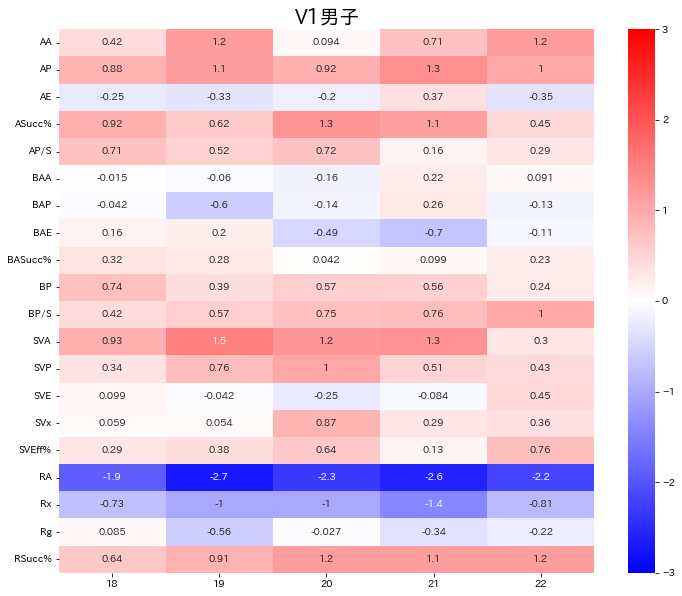

In [27]:
fig = plt.figure(figsize=(12,10))
plt.title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-3,vmax=3)
plt.savefig('graph/hm/{0}{1}.png'.format(division,ex),facecolor='white',bbox_inches="tight")
plt.show()

In [57]:
df4 = pd.DataFrame(index=index)
teams = list(df['Team'].drop_duplicates())
# teams = teams[5:]
df = pd.read_csv(path)
f = lambda x: 1 if x == 'Win' else 0
for team in teams:
    print(team)
    try:
        team_df = df[df['Team']==team].copy()
        team_df['Win'] = team_df['Win_Lose'].map(f)
        df2 = team_df[index].copy()
        # df2['BASucc%'].replace('-', np.nan, inplace=True)
        # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
        df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
        # df2['BASucc%'] =df2['BASucc%'].astype(float)
        df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
        X = df3 # 説明変数
        Y = team_df['Win']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

        lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
        lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
        Y_pred = lr.predict(X_test)
        print(accuracy_score(Y_test, Y_pred))
        # print(Y_test, Y_pred)
        df4[team] = lr.coef_[0]
    except:
        print('勝利or敗北が1以下')
df4

ジェイテクトSTINGS
勝利or敗北が1以下
JTサンダーズ広島
勝利or敗北が1以下
VC長野トライデンツ
勝利or敗北が1以下
東レアローズ
勝利or敗北が1以下
堺ブレイザーズ
勝利or敗北が1以下
大分三好ヴァイセアドラー
勝利or敗北が1以下
サントリーサンバーズ
勝利or敗北が1以下
FC東京
勝利or敗北が1以下
パナソニックパンサーズ
勝利or敗北が1以下
ウルフドッグス名古屋
勝利or敗北が1以下


""
SVP
SVE
SVx
SVEff%


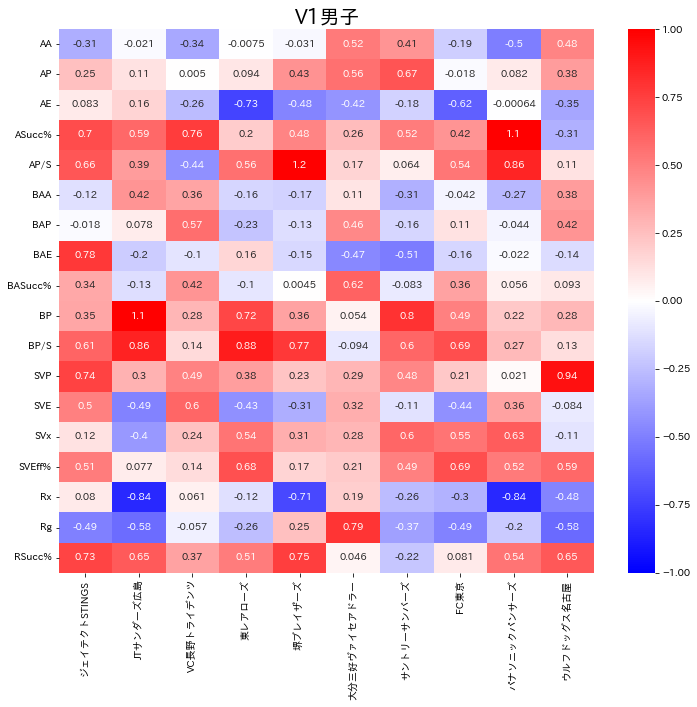

In [44]:
fig = plt.figure(figsize=(12,10))
plt.title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-1,vmax=1)
plt.savefig('graph/hm/team/{0}_team{1}.png'.format(division,ex),facecolor='white',bbox_inches="tight")
plt.show()

In [45]:
df4

,ジェイテクトSTINGS,JTサンダーズ広島,VC長野トライデンツ,東レアローズ,堺ブレイザーズ,大分三好ヴァイセアドラー,サントリーサンバーズ,FC東京,パナソニックパンサーズ,ウルフドッグス名古屋
AA,-0.314540,-0.021341,-0.336673,-0.007522,-0.030892,0.519142,0.414335,-0.188623,-0.502609,0.480906
AP,0.245357,0.112675,0.004958,0.093785,0.425226,0.557625,0.665921,-0.018345,0.081667,0.383821
AE,0.082673,0.164437,-0.263959,-0.730573,-0.482566,-0.415987,-0.178307,-0.618497,-0.000645,-0.349857
ASucc%,0.698242,0.592190,0.764336,0.195780,0.477739,0.264388,0.515560,0.420563,1.107434,-0.307017
AP/S,0.659427,0.385516,-0.436550,0.555162,1.208425,0.171628,0.064308,0.538863,0.855837,0.111938
BAA,-0.120712,0.420225,0.359305,-0.156904,-0.172260,0.106664,-0.309376,-0.042252,-0.273663,0.383633
BAP,-0.017757,0.077663,0.568651,-0.226609,-0.127579,0.461628,-0.162735,0.113312,-0.044412,0.419971
BAE,0.780620,-0.201936,-0.101883,0.162903,-0.151744,-0.467348,-0.513483,-0.158867,-0.022212,-0.139786
BASucc%,0.336805,-0.132232,0.416503,-0.100770,0.004497,0.616709,-0.083237,0.362548,0.055601,0.092815
BP,0.346419,1.128887,0.281269,0.721061,0.361662,0.054066,0.798908,0.492543,0.217273,0.277697


In [46]:
team_df

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%,Win
9,131,69,9,52.7,13.80,30,15,3,50.0,12,...,112,5,11,33,9.4,84,32.0,13.0,45.8,1
19,99,54,10,54.5,13.50,19,11,2,57.9,5,...,96,2,9,24,6.0,60,29.0,18.0,63.3,0
22,101,52,8,51.5,13.00,16,8,3,50.0,10,...,89,2,16,23,4.2,74,32.0,21.0,57.4,1
34,78,40,5,51.3,13.33,19,11,3,57.9,7,...,69,4,16,20,7.2,57,17.0,23.0,50.0,1
40,94,43,6,45.7,14.33,24,13,2,54.2,10,...,66,0,12,13,0.4,61,24.0,9.0,46.7,1
52,109,54,6,49.5,13.50,22,13,3,59.1,13,...,94,6,23,12,3.5,81,37.0,22.0,59.3,1
63,65,37,4,56.9,12.33,22,13,2,59.1,12,...,49,0,12,10,-1.0,59,22.0,13.0,48.3,1
73,106,55,10,51.9,13.75,24,11,3,45.8,10,...,86,4,11,17,6.4,69,26.0,8.0,43.5,1
84,74,41,7,55.4,13.67,25,12,4,48.0,4,...,74,7,12,21,12.5,50,25.0,10.0,60.0,0
92,97,50,6,51.5,12.50,18,10,2,55.6,12,...,94,8,12,21,10.9,64,24.0,16.0,50.0,0


In [59]:
df4 = pd.DataFrame(index=index)
df5 = pd.DataFrame(index=['Score'])
teams = list(all_df['Team'].drop_duplicates())
# teams = teams[5:]
# df = pd.read_csv(path)
f = lambda x: 1 if x == 'Win' else 0
for team in teams:
    print(team)
    # try:
    team_df = all_df[all_df['Team']==team].copy()
    team_df['Win'] = team_df['Win_Lose'].map(f)
    df2 = team_df[index].copy()
    # df2['BASucc%'].replace('-', np.nan, inplace=True)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
    # df2['BASucc%'] =df2['BASucc%'].astype(float)
    df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
    X = df3 # 説明変数
    Y = team_df['Win']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
    Y_pred = lr.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    print(score)
    df5[team] = score
    # print(Y_test, Y_pred)
    df4[team] = lr.coef_[0]
    # except:
        # print('勝利or敗北が1以下')
df4

サントリーサンバーズ
0.6206896551724138
JTサンダーズ
0.6
パナソニックパンサーズ
0.9
FC東京
0.8275862068965517
東レアローズ
0.4827586206896552
豊田合成トレフェルサ
0.7
ジェイテクトSTINGS
0.5862068965517241
堺ブレイザーズ
0.5517241379310345
大分三好ヴァイセアドラー
0.72
VC長野トライデンツ
0.92
ウルフドッグス名古屋
0.47368421052631576
JTサンダーズ広島
0.7


,サントリーサンバーズ,JTサンダーズ,パナソニックパンサーズ,FC東京,東レアローズ,豊田合成トレフェルサ,ジェイテクトSTINGS,堺ブレイザーズ,大分三好ヴァイセアドラー,VC長野トライデンツ,ウルフドッグス名古屋,JTサンダーズ広島
SVP,0.301583,-0.026678,0.405595,0.586407,0.377804,0.028956,0.641580,0.303296,0.429221,0.317448,0.777736,0.033085
SVE,0.275119,-0.335901,-0.554688,-0.249316,0.076656,0.148941,-0.088608,-0.481796,-0.026459,0.253085,-0.476473,-0.446376
SVx,0.338010,-0.245776,-0.203962,0.794970,0.391728,0.929892,0.095038,0.745455,0.995367,0.944945,-0.098892,0.233480
SVEff%,0.572229,0.380241,0.708927,-0.017871,0.544189,0.484102,0.425323,0.223084,-0.609877,-0.339083,-0.015026,0.697058


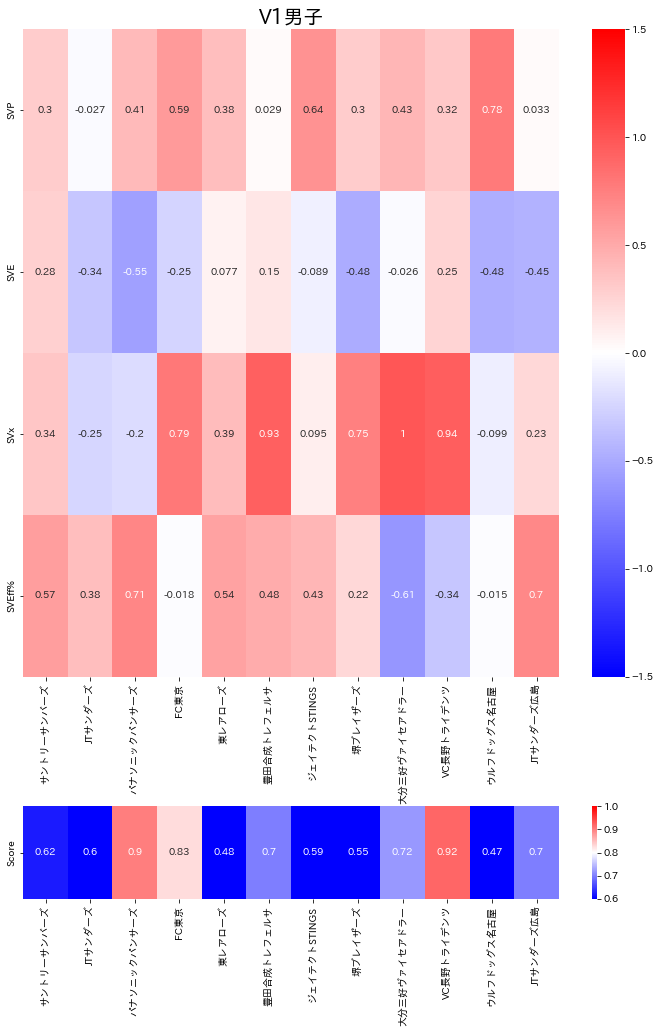

In [60]:
fig = plt.figure(figsize=(12,16))
grid = plt.GridSpec(8,1)
ax1 = fig.add_subplot(grid[0:6,0])
ax2 = fig.add_subplot(grid[7,0])
ax1.set_title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-1.5,vmax=1.5,ax=ax1)
sns.heatmap(df5,annot=True,cmap='bwr',vmin=0.6,vmax=1,ax=ax2)
plt.savefig('graph/hm/team/{0}_team{1}_00-22.png'.format(division,ex),facecolor='white')
plt.show()

In [27]:
df5

,大同特殊鋼レッドスター,警視庁フォートファイターズ,VC長野トライデンツ,つくばユナイテッドSunGAIA,富士通カワサキレッドスピリッツ,埼玉アザレア,大分三好ヴァイセアドラー,トヨタ自動車サンホークス,長野GaRons,東京ヴェルディ,きんでんトリニティーブリッツ,ヴォレアス北海道,兵庫デルフィーノ,ヴィアティン三重,サフィルヴァ北海道,千葉ZELVA,奈良ドリーマーズ,クボタスピアーズ
0,0.8,0.789474,0.6,0.809524,0.809524,0.9,0.6,1.0,1.0,0.8125,0.8125,0.916667,1.0,0.909091,0.857143,1.0,0.666667,1.0
